In [1]:
print('hello')

hello


In [2]:
## Define Hebb Function
def trainingNet(weight,bias,polaInput,typeOutput):
    newWeight=[]
    for i in range(0,len(weight)):
        row=[]
        for j in range(0,len(weight[i])):
            a = weight[i][j] + polaInput[i][j] * typeOutput
            row.append(a)
        newWeight.append(row)
    newBias = bias + typeOutput
    return [
        newWeight,
        newBias
    ]
    
def bipolarActivation(val):
    if(val < 0):
        return -1
    return 1
    
## Initialize
def sumFunc(weight,bias,inputVal):
    tambah=0
    for i in range(0,len(weight)):
        for j in range(0,len(weight[i])):
            tambah += weight[i][j] * inputVal[i][j]
    tambah+=bias
    tambah=bipolarActivation(tambah)
    return tambah
    
pola1=[
 [1,1,1],
 [-1,1,-1],
 [-1,1,-1],
]
pola2=[
 [1,-1,1],
 [1,-1,1],
 [1,1,1],
]
weight=[
 [0,0,0],
 [0,0,0],
 [0,0,0],
]
## Training
bias=0
train1= trainingNet(weight,0,pola1,1)
train2= trainingNet(train1[0],train1[1],pola2,-1)
aa = sumFunc(train2[0],train2[1],pola2)
## Testing
pola3=[
 [1,1,-1],
 [-1,1,-1],
 [1,1,-1]
]
aa = sumFunc(train2[0],train2[1],pola3)
print(aa) 

1


In [3]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance  # distance calculation
from sklearn.preprocessing import MinMaxScaler  # normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

data_file = "C:/Users/Thinkpad/Documents/ml_prak/Tugas_mlprak-tm14/data_banknote_authentication.txt"
data_x = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=range(0, 4), dtype=np.float64)
data_y = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=(4,), dtype=np.int64)
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)  # check the shapes

# Helper functions

# Data Normalisation
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

# Euclidean distance
def e_distance(x, y):
    return distance.euclidean(x, y)

# Manhattan distance
def m_distance(x, y):
    return distance.cityblock(x, y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
    winner = [0, 0]
    shortest_distance = np.sqrt(data.shape[1])  # initialise with max distance
    input_data = data[t]
    for row in range(num_rows):
        for col in range(num_cols):
            dist = e_distance(som[row][col], data[t])
            if dist < shortest_distance:
                shortest_distance = dist
                winner = [row, col]
    return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps, max_learning_rate, max_m_distance):
    coefficient = 1.0 - (np.float64(step) / max_steps)
    learning_rate = coefficient * max_learning_rate
    neighbourhood_range = ceil(coefficient * max_m_distance)
    return learning_rate, neighbourhood_range

# hyperparameters
num_rows = 10
num_cols = 10
max_m_distance = 4  # Corrected variable name (max_m_dsitance -> max_m_distance)
max_learning_rate = 0.5
max_steps = int(7.5 * 10e3)

# main function
train_x_norm = minmax_scaler(train_x)  # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1]  # number of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims))  # map construction

# start training iterations
for step in range(max_steps):
    if (step + 1) % 1000 == 0:
        print("Iteration: ", step + 1)  # print out the current iteration for every 1k
    learning_rate, neighbourhood_range = decay(step, max_steps, max_learning_rate, max_m_distance)
    t = np.random.randint(0, high=train_x_norm.shape[0])  # random index of training data
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    for row in range(num_rows):
        for col in range(num_cols):
            if m_distance([row, col], winner) <= neighbourhood_range:
                som[row][col] += learning_rate * (train_x_norm[t] - som[row][col])  # update neighbour's weight
print("SOM training completed")


(1097, 4) (1097,) (275, 4) (275,)
Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
Iteration:  51000
Iteration:  52000
Iteration:  53000
Iteration:  54000
Ite

In [4]:
import math
from collections import Counter
import pandas as pd
import numpy as np

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
        self.feature_names = None  # Untuk menyimpan nama fitur

    def entropy(self, y):
        class_counts = Counter(y)
        total_samples = len(y)
        
        entropy = 0
        for count in class_counts.values():
            prob = count / total_samples
            entropy -= prob * math.log2(prob)
        
        return entropy

    def information_gain(self, X, y, feature_idx, threshold):
        parent_entropy = self.entropy(y)
        
        left_indices = [i for i in range(len(X)) if X[i][feature_idx] < threshold]
        right_indices = [i for i in range(len(X)) if X[i][feature_idx] >= threshold]
        
        if len(left_indices) == 0 or len(right_indices) == 0:
            return 0
        
        left_entropy = self.entropy([y[i] for i in left_indices])
        right_entropy = self.entropy([y[i] for i in right_indices])
        
        n = len(y)
        left_weight = len(left_indices) / n
        right_weight = len(right_indices) / n
        
        child_entropy = left_weight * left_entropy + right_weight * right_entropy
        
        return parent_entropy - child_entropy

    def best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        n_features = len(X[0])
        
        for feature in range(n_features):
            thresholds = set(row[feature] for row in X)
            
            for threshold in thresholds:
                gain = self.information_gain(X, y, feature, threshold)
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_gain

    def build_tree(self, X, y, depth=0):
        n_samples = len(y)
        n_classes = len(set(y))
        
        if (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split or \
           n_classes == 1:
            leaf_value = max(set(y), key=y.count)
            return Node(value=leaf_value)
        
        best_feature, best_threshold, best_gain = self.best_split(X, y)
        
        if best_gain == 0:
            leaf_value = max(set(y), key=y.count)
            return Node(value=leaf_value)
        
        left_indices = [i for i in range(len(X)) if X[i][best_feature] < best_threshold]
        right_indices = [i for i in range(len(X)) if X[i][best_feature] >= best_threshold]
        
        left_subtree = self.build_tree(
            [X[i] for i in left_indices], 
            [y[i] for i in left_indices], 
            depth + 1
        )
        
        right_subtree = self.build_tree(
            [X[i] for i in right_indices], 
            [y[i] for i in right_indices], 
            depth + 1
        )
        
        return Node(
            feature=best_feature, 
            threshold=best_threshold, 
            left=left_subtree, 
            right=right_subtree
        )

    def fit(self, X, y):
        # Simpan nama fitur
        self.feature_names = X.columns.tolist() if hasattr(X, 'columns') else None
        
        # Konversi ke numpy array jika masih DataFrame
        X_array = X.values if hasattr(X, 'values') else X
        y_array = y.values if hasattr(y, 'values') else y
        
        self.root = self.build_tree(X_array.tolist(), list(y_array))

    def predict_single(self, x):
        node = self.root
        while node.value is None:
            if x[node.feature] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def predict(self, X):
        # Konversi ke numpy array jika masih DataFrame
        X_array = X.values if hasattr(X, 'values') else X
        
        return [self.predict_single(x) for x in X_array]
    
    def print_tree(self, node=None, indent="", last=True):
        """
        Cetak struktur decision tree
        """
        if node is None:
            node = self.root
        
        # Untuk node daun
        if node.value is not None:
            print(indent + ("└── " if last else "├── ") + f"Leaf: {node.value}")
            return
        
        # Untuk node internal
        feature_name = self.feature_names[node.feature] if self.feature_names else f"Feature {node.feature}"
        print(indent + ("└── " if last else "├── ") + 
              f"{feature_name} < {node.threshold:.2f}")
        
        # Update indent untuk subtree
        indent += "    " if last else "│   "
        
        # Rekursi untuk subtree kiri dan kanan
        self.print_tree(node.left, indent, node.right.value is not None)
        self.print_tree(node.right, indent, True)

def evaluate_model(y_true, y_pred):
    """
    Fungsi untuk mengevaluasi model
    """
    # Akurasi
    accuracy = np.mean(y_true == y_pred)
    
    # Confusion matrix
    unique_classes = np.unique(y_true)
    confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)
    
    for true, pred in zip(y_true, y_pred):
        true_idx = np.where(unique_classes == true)[0][0]
        pred_idx = np.where(unique_classes == pred)[0][0]
        confusion_matrix[true_idx, pred_idx] += 1
    
    # Laporan klasifikasi
    print("\nConfusion Matrix:")
    print(confusion_matrix)
    print(f"\nAccuracy: {accuracy:.2%}")
    
    # Detail per kelas
    print("\nClass-wise Performance:")
    for i, cls in enumerate(unique_classes):
        tp = confusion_matrix[i, i]
        fn = np.sum(confusion_matrix[i, :]) - tp
        fp = np.sum(confusion_matrix[:, i]) - tp
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        print(f"\nClass {cls}:")
        print(f"Precision: {precision:.2%}")
        print(f"Recall: {recall:.2%}")
        print(f"F1-Score: {f1:.2%}")

# Main execution
def main():
    # Load data
    train_df = pd.read_csv("C:/Users/Thinkpad/Documents/ml_prak/Tugas_mlprak-tm14/simulasi-up-pembelajaran-mesin/train.csv")
    test_df = pd.read_csv("C:/Users/Thinkpad/Documents/ml_prak/Tugas_mlprak-tm14/simulasi-up-pembelajaran-mesin/test.csv")

    # Prepare train and test data
    x_train = train_df.drop('Species', axis=1)
    y_train = train_df['Species']
    x_test = test_df

    # Inisialisasi dan latih model
    clf = DecisionTreeClassifier(max_depth=5)  # Anda bisa sesuaikan max_depth
    clf.fit(x_train, y_train)

    # Cetak struktur pohon keputusan
    print("\nDecision Tree Structure:")
    clf.print_tree()

    # Prediksi pada data uji
    predictions = clf.predict(x_test)
    submission = test_df[['Id']].copy()
    submission['Species'] = predictions
    submission.to_csv('Submiission.csv',index=False)

if __name__ == "__main__":
    main()


Decision Tree Structure:
└── Id < 101.00
    └── Id < 52.00
        └── Leaf: Iris-setosa
        └── Leaf: Iris-versicolor
    └── Leaf: Iris-virginica


In [5]:
df = pd.read_csv('C:/Users/Thinkpad/Documents/ml_prak/Tugas_Mlprak_tm10/HomeC.csv', low_memory=False)
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]            5

In [11]:
df['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

Confusion Matrix:
[[7781   35   93]
 [1356   25   46]
 [ 199   40  425]]


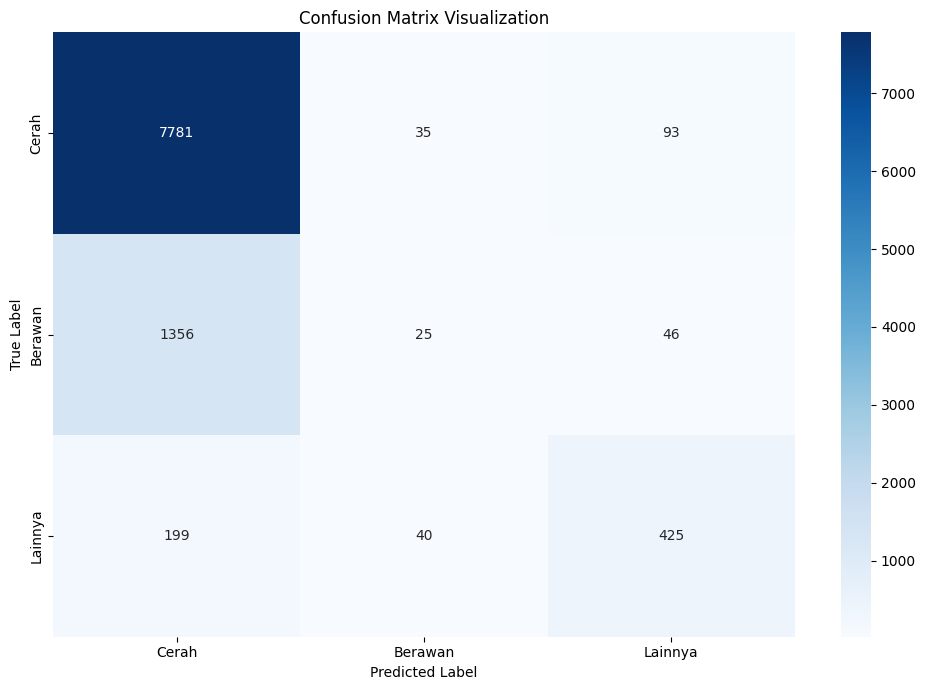


Detailed Classification Metrics:
Cerah:
  Precision: 0.8334
  Recall: 0.9838
  F1-Score: 0.9024
Berawan:
  Precision: 0.2500
  Recall: 0.0175
  F1-Score: 0.0327
Lainnya:
  Precision: 0.7535
  Recall: 0.6401
  F1-Score: 0.6922

Accuracy Score:
0.8231

Original Summary Distribution:
summary
Clear            39328
Partly Cloudy     5974
Light Rain        1450
Mostly Cloudy      754
Light Snow         638
Overcast           522
Rain               464
Flurries           464
Drizzle            232
Breezy             116
Snow                58
Name: count, dtype: int64

Categorized Weather Class Distribution:
weather_class
0    39444
1     7250
2     3306
Name: count, dtype: int64

Predicted Class Distribution:
0    9336
2     564
1     100
Name: count, dtype: int64


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class AdvancedHebbNeuralNetwork:
    def __init__(self, input_size, learning_rate=0.1, num_classes=3):
        # Initialize with more variance for minority classes
        self.weights = np.random.randn(num_classes, input_size) * np.sqrt(2.0 / (input_size + num_classes))
        self.bias = np.zeros(num_classes)
        self.learning_rate = learning_rate
        self.num_classes = num_classes
    
    def train(self, X, y, epochs=1000):
        # Explicitly track class distribution
        class_counts = np.bincount(y)
        max_count = np.max(class_counts)
        
        # Compute class weights to balance learning
        class_weights = max_count / class_counts
        
        for epoch in range(epochs):
            # More aggressive shuffling for minority classes
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            for i in range(len(X_shuffled)):
                # Compute outputs with class weighting
                outputs = np.dot(self.weights, X_shuffled[i]) + self.bias
                
                # Boost minority class sensitivity (adjusting for class weighting)
                outputs += class_weights * 0.5
                
                predicted_class = np.argmax(outputs)
                true_class = y_shuffled[i]
                
                # More aggressive learning for minority classes
                if predicted_class != true_class:
                    for j in range(self.num_classes):
                        # Exponentially increased learning rate for minority classes
                        learning_multiplier = class_weights[j]
                        
                        if j == true_class:
                            # Boost true class with weighted learning
                            self.weights[j] += self.learning_rate * learning_multiplier * X_shuffled[i]
                            self.bias[j] += self.learning_rate * learning_multiplier
                        else:
                            # Suppress other classes
                            self.weights[j] -= self.learning_rate * X_shuffled[i]
                            self.bias[j] -= self.learning_rate
        
        return self
    
    def predict(self, X):
        # Compute outputs with slight class bias
        outputs = np.dot(X, self.weights.T) + self.bias
        
        # Add a small bias to encourage prediction across all classes
        outputs += np.array([0, 0.1, 0.1])
        
        return np.argmax(outputs, axis=1)

# Load the dataset
df = pd.read_csv('C:/Users/Thinkpad/Documents/ml_prak/Tugas_Mlprak_tm10/HomeC.csv', low_memory=False)
df.dropna(inplace=True)

# Take only first 50,000 samples
df = df.head(50000)

# Comprehensive weather categorization function
def categorize_weather(summary):
    clear_conditions = ['Clear', 'Dry', 'Breezy']
    
    cloudy_conditions = [
        'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 
        'Breezy and Mostly Cloudy', 'Breezy and Partly Cloudy', 'Foggy'
    ]
    
    other_conditions = [
        'Drizzle', 'Light Rain', 'Rain', 'Light Snow', 
        'Flurries', 'Snow', 'Rain and Breezy', 
        'Flurries and Breezy', 'Heavy Snow'
    ]
    
    if summary in clear_conditions:
        return 0  # Cerah (Clear)
    elif summary in cloudy_conditions:
        return 1  # Berawan (Cloudy)
    else:
        return 2  # Lainnya (Others)

# Add the categorized column
df['weather_class'] = df['summary'].apply(categorize_weather)

# Custom classification report function
def custom_classification_report(y_true, y_pred, target_names):
    print("\nDetailed Classification Metrics:")
    for i, name in enumerate(target_names):
        # Precision
        class_pred = (y_pred == i)
        class_true = (y_true == i)
        
        true_positives = np.sum((class_pred) & (class_true))
        total_predicted = np.sum(class_pred)
        total_actual = np.sum(class_true)
        
        # Handle potential division by zero
        precision = true_positives / total_predicted if total_predicted > 0 else 0
        recall = true_positives / total_actual if total_actual > 0 else 0
        
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        print(f"{name}:")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")

# Select multiple input features
input_features = ['temperature', 'humidity', 'windSpeed']

# Prepare the dataset
X = df[input_features].values
y = df['weather_class'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Advanced Hebb Neural Network
hebb_nn = AdvancedHebbNeuralNetwork(input_size=len(input_features), learning_rate=0.1)
hebb_nn.train(X_train_scaled, y_train)

# Predict and evaluate
y_pred = hebb_nn.predict(X_test_scaled)

# Compute and print evaluation metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cerah', 'Berawan', 'Lainnya'], 
            yticklabels=['Cerah', 'Berawan', 'Lainnya'])
plt.title('Confusion Matrix Visualization')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Use custom classification report
custom_classification_report(y_test, y_pred, 
                            target_names=['Cerah', 'Berawan', 'Lainnya'])

# Print overall accuracy
print("\nAccuracy Score:")
print(np.mean(y_test == y_pred))

# Additional insights
print("\nOriginal Summary Distribution:")
print(df['summary'].value_counts())

print("\nCategorized Weather Class Distribution:")
print(df['weather_class'].value_counts())

print("\nPredicted Class Distribution:")
print(pd.Series(y_pred).value_counts())


Confusion Matrix:
[[6313 1417  179]
 [ 880  480   67]
 [ 166   50  448]]

Classification Report:
              precision    recall  f1-score   support

       Cerah       0.86      0.80      0.83      7909
     Berawan       0.25      0.34      0.28      1427
     Lainnya       0.65      0.67      0.66       664

    accuracy                           0.72     10000
   macro avg       0.58      0.60      0.59     10000
weighted avg       0.76      0.72      0.74     10000



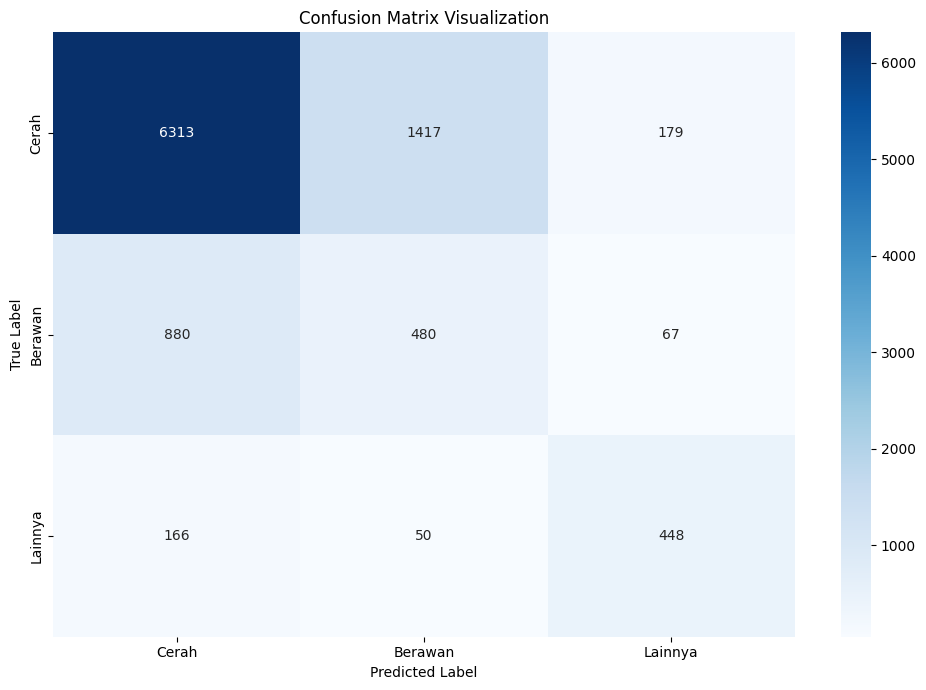


Original Summary Distribution:
summary
Clear            39328
Partly Cloudy     5974
Light Rain        1450
Mostly Cloudy      754
Light Snow         638
Overcast           522
Rain               464
Flurries           464
Drizzle            232
Breezy             116
Snow                58
Name: count, dtype: int64

Categorized Weather Class Distribution:
weather_class
0    39444
1     7250
2     3306
Name: count, dtype: int64

Predicted Class Distribution:
0    7359
1    1947
2     694
Name: count, dtype: int64


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

class FastSelfOrganizingMap:
    def __init__(self, input_size, grid_size=(10, 10), learning_rate=0.1, random_state=42):
        np.random.seed(random_state)
        self.input_size = input_size
        self.grid_size = grid_size
        self.learning_rate = learning_rate
        
        # Initialize weights with reduced complexity
        self.weights = np.random.randn(grid_size[0], grid_size[1], input_size) * 0.1
        self.class_grid_mapping = None
    
    def _find_best_matching_unit(self, input_vector):
        """Find the Best Matching Unit (BMU) for a given input vector"""
        # Vectorized distance calculation
        distances = np.sum((self.weights - input_vector) ** 2, axis=2)
        return np.unravel_index(np.argmin(distances), self.grid_size)
    
    def train(self, X, y, max_iterations=5000):
        """Simplified and faster training method"""
        # Normalize input data
        X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)
        
        # Compute class distribution
        unique_classes, class_counts = np.unique(y, return_counts=True)
        class_weights = max(class_counts) / class_counts
        
        for iteration in range(max_iterations):
            # Adaptive learning rate
            alpha = self.learning_rate * (1 - iteration / max_iterations)
            
            # Randomly select an input
            idx = np.random.randint(len(X_normalized))
            input_vector = X_normalized[idx]
            true_class = y[idx]
            
            # Find Best Matching Unit
            bmu_coords = self._find_best_matching_unit(input_vector)
            
            # Compute neighborhood radius
            radius = max(1, int(max(self.grid_size) * (1 - iteration / max_iterations)))
            
            # Update weights in the neighborhood
            for i in range(self.grid_size[0]):
                for j in range(self.grid_size[1]):
                    # Distance from BMU
                    dist = np.sqrt((i - bmu_coords[0])**2 + (j - bmu_coords[1])**2)
                    
                    # Skip if outside neighborhood
                    if dist > radius:
                        continue
                    
                    # Neighborhood influence
                    influence = np.exp(-(dist**2) / (2 * (radius/2)**2))
                    
                    # Update with class-aware learning
                    class_multiplier = class_weights[np.where(unique_classes == true_class)[0][0]]
                    self.weights[i, j] += alpha * influence * class_multiplier * (input_vector - self.weights[i, j])
        
        # Map classes to grid
        self._map_classes_to_grid(X_normalized, y)
        
        return self
    
    def _map_classes_to_grid(self, X_normalized, y):
        """Map classes to grid locations"""
        grid_assignments = np.full(self.grid_size, -1, dtype=int)
        
        for x, label in zip(X_normalized, y):
            bmu_coords = self._find_best_matching_unit(x)
            
            # Simple assignment strategy
            if grid_assignments[bmu_coords] == -1:
                grid_assignments[bmu_coords] = label
        
        self.class_grid_mapping = grid_assignments
    
    def predict(self, X):
        """Predict classes based on best matching units"""
        # Normalize input data
        X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)
        
        predictions = []
        for x in X_normalized:
            bmu_coords = self._find_best_matching_unit(x)
            
            # Predict based on grid mapping
            if self.class_grid_mapping is not None:
                prediction = self.class_grid_mapping[bmu_coords]
            else:
                # Fallback to majority class
                prediction = 0  # Default to most common class
            
            predictions.append(prediction)
        
        return np.array(predictions)

# Load the dataset
df = pd.read_csv('C:/Users/Thinkpad/Documents/ml_prak/Tugas_Mlprak_tm10/HomeC.csv', low_memory=False)
df.dropna(inplace=True)

# Take only first 50,000 samples
df = df.head(50000)

# Weather categorization function
def categorize_weather(summary):
    clear_conditions = ['Clear', 'Dry', 'Breezy']
    cloudy_conditions = [
        'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 
        'Breezy and Mostly Cloudy', 'Breezy and Partly Cloudy', 'Foggy'
    ]
    if summary in clear_conditions:
        return 0  # Cerah (Clear)
    elif summary in cloudy_conditions:
        return 1  # Berawan (Cloudy)
    else:
        return 2  # Lainnya (Others)

# Add the categorized column
df['weather_class'] = df['summary'].apply(categorize_weather)

# Select input features
input_features = ['temperature', 'humidity', 'windSpeed']

# Prepare the dataset
X = df[input_features].values
y = df['weather_class'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Fast Self-Organizing Map
som = FastSelfOrganizingMap(
    input_size=len(input_features), 
    grid_size=(10, 10),  # Reduced grid size
    learning_rate=0.1,   # Lower learning rate
    random_state=42
)
som.train(X_train_scaled, y_train, max_iterations=5000)

# Predict and evaluate
y_pred = som.predict(X_test_scaled)

# Compute and print evaluation metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Cerah', 'Berawan', 'Lainnya']))

# Visualize Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cerah', 'Berawan', 'Lainnya'], 
            yticklabels=['Cerah', 'Berawan', 'Lainnya'])
plt.title('Confusion Matrix Visualization')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Additional insights
print("\nOriginal Summary Distribution:")
print(df['summary'].value_counts())

print("\nCategorized Weather Class Distribution:")
print(df['weather_class'].value_counts())

print("\nPredicted Class Distribution:")
print(pd.Series(y_pred).value_counts())